# Análisis exploratorio de feature selection
*   Completitud de variables,
*   Varianza de variables
*   Determinar qué variables vale la pena eliminar/mantener

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/dreamAD"

final_merged_data.csv


In [4]:
#Read file
file_path = '/content/drive/My Drive/dreamAD/final_merged_data.csv'
data = pd.read_csv(file_path)

In [5]:
data.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.021958,0.206852,-0.197567,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


# Completeness analysis

In [79]:
#Check missing values
missing_count = data.isna().sum()
print(len(missing_count[missing_count > 0]))

0


In [6]:
def completeness_filter(df: pd.DataFrame, min_completeness_pct: float = 40.0):

    #Numeric and non-numeric columnsvariation_of_information_score
    numerics = df.select_dtypes(include=np.number).columns.tolist()
    no_numerics = df.select_dtypes(exclude=np.number).columns.tolist()
    #Completeness analysis
    completeness = df[numerics].apply(lambda col: (col != 0).sum() / len(col) * 100)

    # 3. Crear la tabla de completitud (Tercer resultado)
    pct_completeness = completeness.reset_index()
    pct_completeness.columns = ['Variable', 'completeness_Pct']
    pct_completeness = pct_completeness.sort_values(by='completeness_Pct', ascending=True)

    #Vars that passed the filter
    numeric_filtered = completeness[completeness >= min_completeness_pct].index.tolist()
    #Combine non-numeric columns (which are always saved) with numeric columns that passed
    final_cols = no_numerics + numeric_filtered

    #Final filter
    df_filtered = df[final_cols]

    return df_filtered, numeric_filtered, pct_completeness

In [7]:
completeness_filtered, completeness_vars, completeness_pct = completeness_filter(data, 80.0)

In [8]:
completeness_filtered.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.021958,0.206852,-0.197567,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


In [9]:
len(completeness_vars)

6446

In [10]:
completeness_pct.head(10)

,Variable,completeness_Pct
222,clustering_global_L4-IT_MTG,0.0
706,largest_community_size_Pax6_A9,0.0
240,clustering_local_mean_L5-6-NP_A9,0.0
241,clustering_global_L5-6-NP_A9,0.0
688,n_nodes_Pax6_A9,0.0
689,n_edges_Pax6_A9,0.0
716,clustering_global_Pax6_MTG,0.0
722,Q_modularity_Pax6_MTG,0.0
221,clustering_local_mean_L4-IT_MTG,0.0
705,n_communities_Pax6_A9,0.0


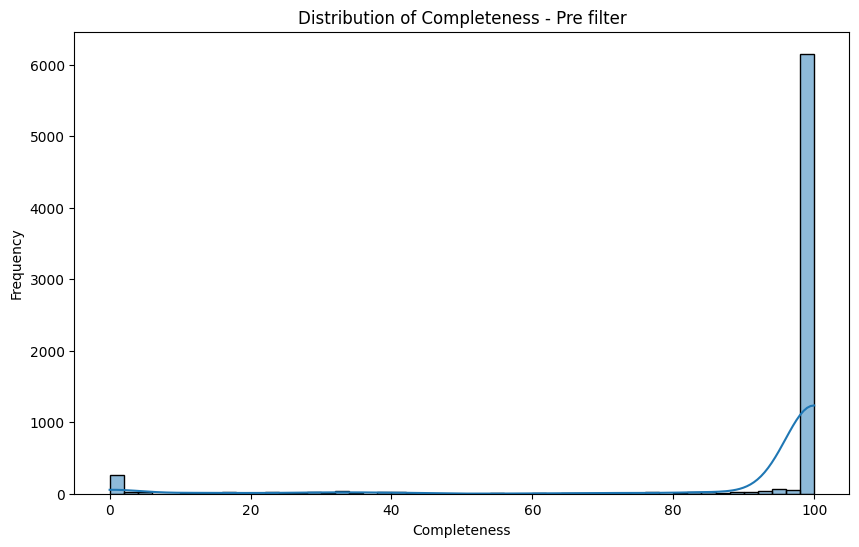

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(completeness_pct['completeness_Pct'], bins=50, kde=True)
plt.title('Distribution of Completeness - Pre filter')
plt.xlabel('Completeness')
plt.ylabel('Frequency')
plt.show()

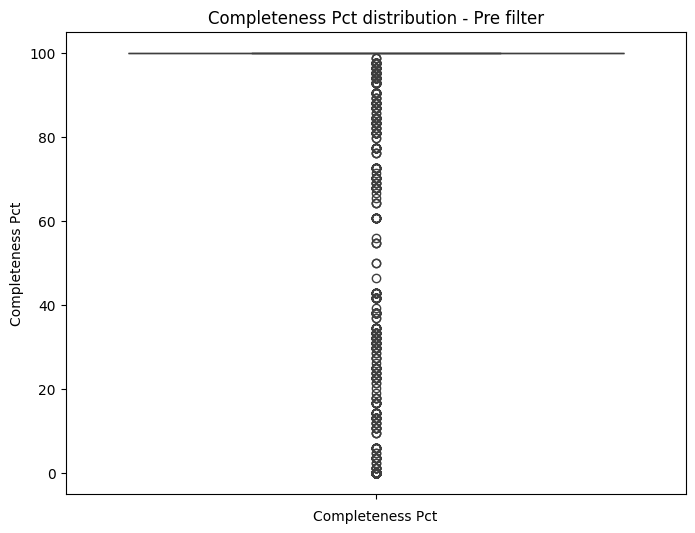

In [12]:
#Baxplat
plt.figure(figsize=(8, 6))
sns.boxplot(y=completeness_pct['completeness_Pct'])
plt.title('Completeness Pct distribution - Pre filter')
plt.xlabel('Completeness Pct')
plt.ylabel('Completeness Pct')
plt.savefig('boxplot_completeness.png')

In [13]:
_, _, post_completeness_pct = completeness_filter(completeness_filtered)

In [14]:
post_completeness_pct.head(10)

,Variable,completeness_Pct
179,n_components_Lamp5_MTG,80.952381
178,frac_giant_component_Lamp5_MTG,80.952381
6,CERAD,80.952381
180,deg_mean_Lamp5_MTG,80.952381
184,largest_community_size_Lamp5_MTG,80.952381
181,deg_median_Lamp5_MTG,80.952381
182,kcore_max_Lamp5_MTG,80.952381
183,n_communities_Lamp5_MTG,80.952381
175,diameter_Lamp5_MTG,80.952381
174,avg_path_len_Lamp5_MTG,80.952381


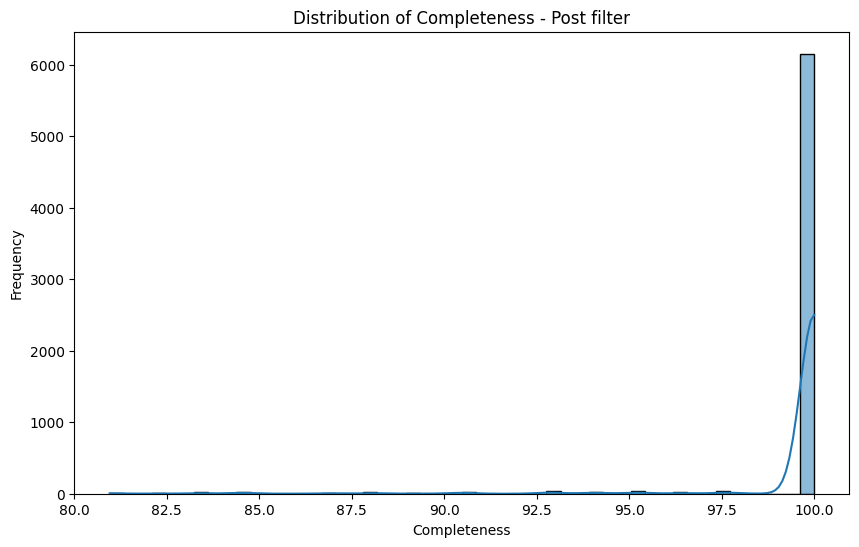

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(post_completeness_pct['completeness_Pct'], bins=50, kde=True)
plt.title('Distribution of Completeness - Post filter')
plt.xlabel('Completeness')
plt.ylabel('Frequency')
plt.show()

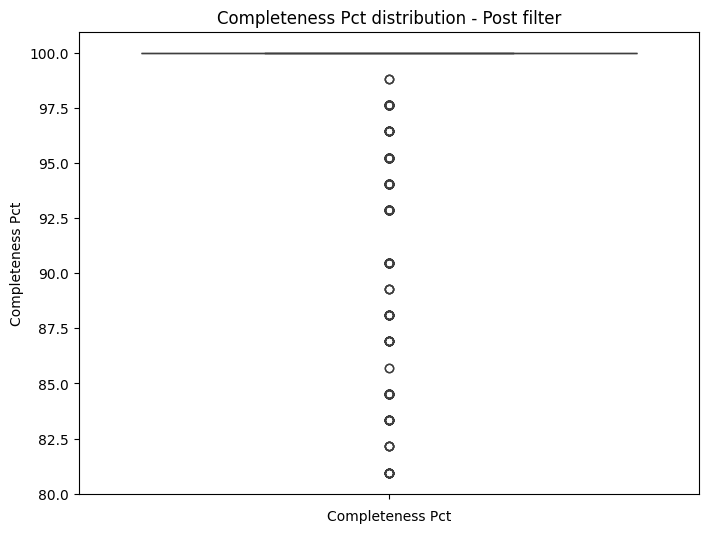

In [16]:
#Baxplat
plt.figure(figsize=(8, 6))
sns.boxplot(y=post_completeness_pct['completeness_Pct'])
plt.title('Completeness Pct distribution - Post filter')
plt.xlabel('Completeness Pct')
plt.ylabel('Completeness Pct')
plt.savefig('boxplot_completeness.png')

# 2. Variance

In [17]:
def varianced(df, quartile=4, keep_non_numeric=True, return_variance_table=False):
    """
    Filtra columnas de un DataFrame según su varianza y, opcionalmente,
    devuelve la tabla de varianzas.

    Args:
    -----------
    df (pd.DataFrame): DataFrame de entrada.
    quartile (int): Cuartil a conservar (1, 2, 3, o 4).
    keep_non_numeric (bool): Si es True, conserva las columnas no numéricas.
    return_variance_table (bool): Si es True, devuelve también la tabla de varianzas.

    Returns:
    --------
    pd.DataFrame or tuple:
        - Si return_variance_table es False (default), devuelve solo el DataFrame filtrado.
        - Si es True, devuelve una tupla: (DataFrame_filtrado, DataFrame_de_varianzas).
    """
    if isinstance(df, dict):
        df = pd.DataFrame(df)

    # Calcula la varianza de todas las columnas numéricas
    numeric_cols = df.select_dtypes(include=["number"])
    variance_table = numeric_cols.var().to_frame("Variance").sort_values("Variance", ascending=False)

    # Calcula los límites de los cuartiles
    quantiles = np.quantile(variance_table["Variance"], [0, 0.25, 0.5, 0.75, 1.0])
    bounds = {
        1: (quantiles[0], quantiles[1]),
        2: (quantiles[1], quantiles[2]),
        3: (quantiles[2], quantiles[3]),
        4: (quantiles[3], quantiles[4])
    }

    # Selecciona las variables dentro del cuartil especificado
    low, high = bounds[quartile]
    variance_vars = variance_table[
        (variance_table["Variance"] >= low) & (variance_table["Variance"] <= high)
    ].index.tolist()

    # Ensambla el DataFrame filtrado
    if keep_non_numeric:
        non_numeric_cols = df.select_dtypes(exclude=["number"]).columns.tolist()
        variance_vars = non_numeric_cols + variance_vars
        filtered_df = df[variance_vars]
    else:
        filtered_df = df[variance_vars]

    # Decide qué devolver basado en el nuevo parámetro
    if return_variance_table:
        return filtered_df, variance_table, variance_vars
    else:
        return filtered_df, variance_vars

In [18]:
variance_filter, variance_data, variance_vars = varianced(data, quartile=3, return_variance_table=True)

In [19]:
variance_filter.head(10)

,Donor ID,4_Sst_A9,32_L6-CT_A9,46_Oligodendrocyte_A9,107_L2-3-IT_A9,120_L5-IT_MTG,21_L6-IT_MTG,102_L4-IT_MTG,91_Oligodendrocyte_MTG,27_L5-IT_MTG,...,77_L5-ET_A9,77_Endothelial_A9,77_Pax6_MTG,77_Sst-Chodl_MTG,77_Sst-Chodl_A9,77_Pax6_A9,77_VLMC_A9,37_L6b_MTG,perc_targeted_50_Pvalb_A9,10_L6-IT-Car3_MTG
0,H20-33-034,-0.214357,0.154588,-0.376145,-0.568315,-0.320554,0.488431,0.027838,-0.161690,0.082198,...,-0.331716,-0.303661,-0.305186,-0.303661,-0.290001,-0.311495,-0.290001,0.094291,0.20,-0.134066
1,H21-33-035,-0.674085,0.249331,-0.675951,-0.583855,0.197997,-0.192516,0.448993,-0.541555,-0.495461,...,-0.252510,-0.252510,-0.252510,-0.306103,-0.252510,-0.252510,-0.252510,0.011959,0.20,-0.001594
2,H20-33-014,-0.870037,0.146164,-0.253442,-0.420892,0.075997,0.579823,0.251080,-0.044463,-0.502546,...,-0.287868,-0.290001,-0.304482,-0.304482,-0.433972,-0.304817,-0.363144,0.090475,0.28,-0.022146
3,H21-33-015,-0.629151,0.280975,-0.672948,-0.614739,0.179967,-0.163466,0.448450,-0.528808,-0.472534,...,-0.075811,-0.075811,-0.075811,-0.174731,-0.597141,-0.357664,-0.059521,0.024518,0.24,0.007216
4,H20-33-033,-0.193419,0.029182,-0.313316,0.199206,0.207330,-0.079737,0.532894,-0.538446,-0.483711,...,-0.326319,-0.304817,-0.300643,-0.062847,-0.326678,-0.298900,-0.326678,0.096941,0.20,-0.053516
5,H21-33-043,-0.639367,0.274661,-0.681372,-0.611235,0.170006,-0.166037,0.452691,-0.526649,-0.472035,...,-0.440735,-0.211197,-0.440735,-0.059521,-0.453564,-0.228967,-0.440735,0.040542,0.20,0.009258
6,H21-33-005,-0.639695,0.274415,-0.675577,-0.487877,0.210892,-0.168694,0.455290,-0.550881,-0.513369,...,-0.429304,-0.302819,-0.429304,-0.444702,-0.228967,-0.304646,-0.429304,0.029613,0.30,0.017456
7,H20-33-031,-0.401496,-0.369065,-0.396656,-0.225246,-0.223911,-0.075634,0.396807,-0.329216,0.258790,...,-0.433972,-0.326678,-0.397556,-0.290001,-0.359042,-0.359042,-0.287868,0.111251,0.20,0.007206
8,H21-33-036,-0.627862,0.275338,-0.673015,-0.524661,0.199607,-0.163220,0.453597,-0.548591,-0.500641,...,-0.166089,-0.166089,-0.166089,-0.087922,-0.059521,-0.043626,-0.444702,0.025004,0.20,-0.002197
9,H21-33-002,-0.645870,0.272416,-0.689786,-0.583527,0.156267,-0.163576,0.453461,-0.516933,-0.459802,...,-0.453564,-0.453564,-0.453564,-0.100471,-0.444702,-0.440735,-0.211197,0.026867,0.40,0.013210


In [20]:
variance_data.head(10)

,Variance
n_edges_L5-IT_MTG,6.895924e+09
n_edges_L2-3-IT_A9,6.305776e+09
n_edges_L2-3-IT_MTG,5.859007e+09
n_edges_L5-IT_A9,5.731587e+09
n_edges_Pvalb_MTG,3.492076e+09
n_edges_L4-IT_A9,3.342557e+09
n_edges_Pvalb_A9,3.254402e+09
n_edges_Vip_MTG,2.881807e+09
n_edges_L6-IT_A9,2.722178e+09
n_edges_L4-IT_MTG,2.707036e+09


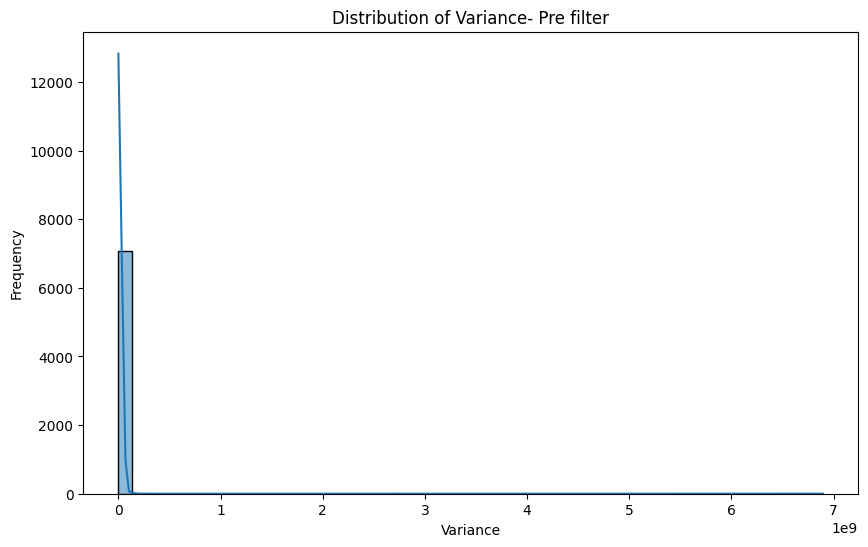

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(variance_data['Variance'], bins=50, kde=True)
plt.title('Distribution of Variance- Pre filter')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

In [22]:
len(variance_vars)

1775

In [23]:
_,var_pos_filter,_ = varianced(variance_filter, quartile=1, return_variance_table=True)

In [24]:
var_pos_filter

,Variance
4_Sst_A9,0.042098
32_L6-CT_A9,0.042057
46_Oligodendrocyte_A9,0.042055
107_L2-3-IT_A9,0.042055
120_L5-IT_MTG,0.042045
...,...
77_Pax6_A9,0.010338
77_VLMC_A9,0.010338
37_L6b_MTG,0.010335
perc_targeted_50_Pvalb_A9,0.010334


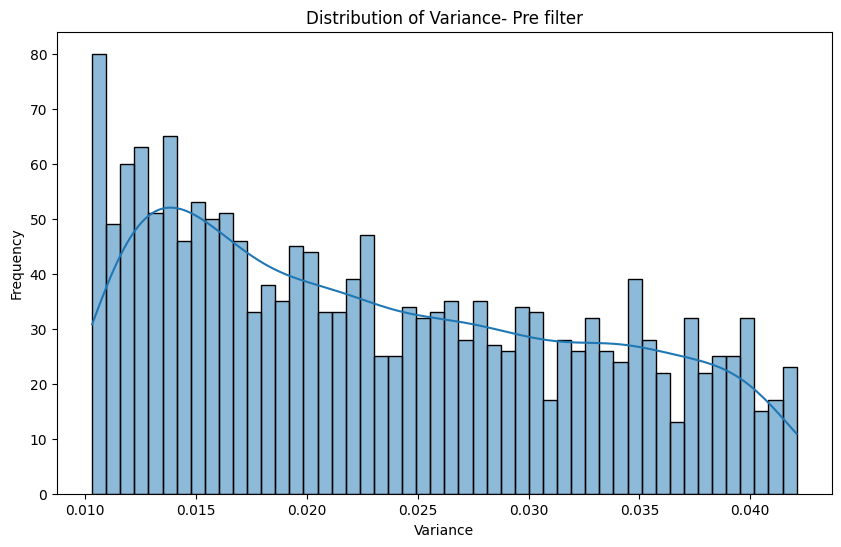

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(var_pos_filter['Variance'], bins=50, kde=True)
plt.title('Distribution of Variance- Pre filter')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

### 3. Outliers (Flooring and caping)

In [26]:
data_simple = data.columns[:100].tolist()
data_simple = data[data_simple]
data_simple.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,clustering_global_Chandelier_A9,assortativity_Chandelier_A9,deg_mean_Chandelier_A9,deg_median_Chandelier_A9,deg_sd_Chandelier_A9,kcore_max_Chandelier_A9,Q_modularity_Chandelier_A9,perc_targeted_50_Chandelier_A9,n_communities_Chandelier_A9,largest_community_size_Chandelier_A9
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.0,-0.5,1.500000,1.5,0.57735,1.0,0.0,0.50,1.0,4.0
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.0,-1.0,1.333333,1.0,0.57735,1.0,0.0,0.34,1.0,3.0
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0


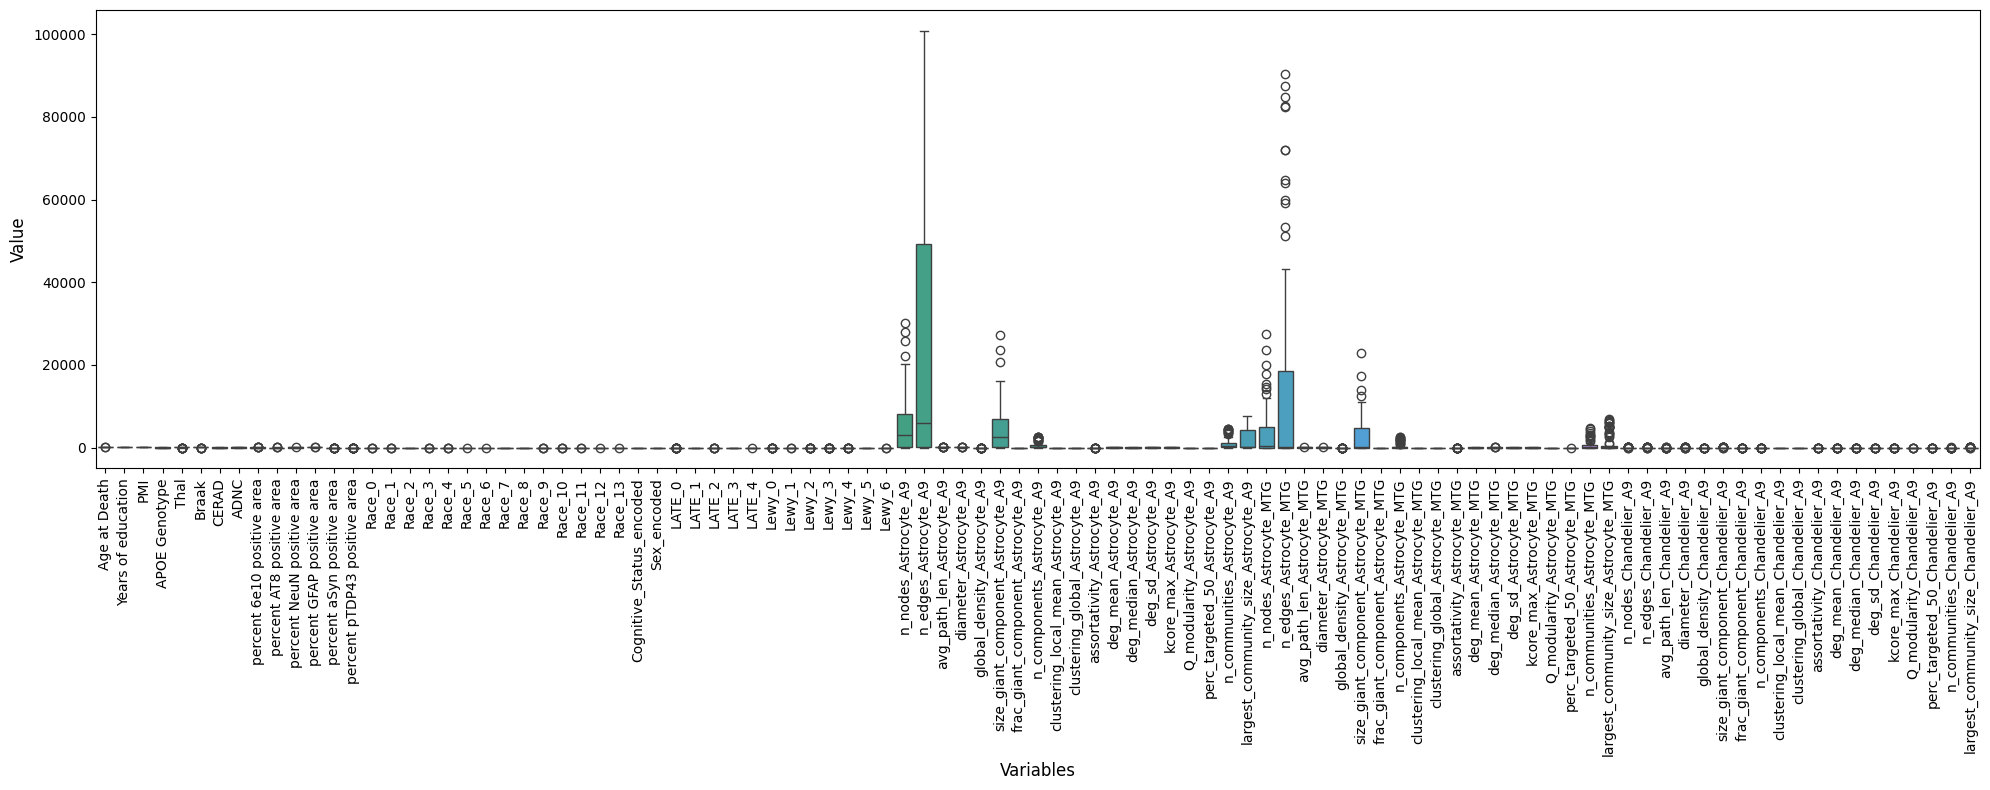

In [27]:
#Vars boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(data=data_simple)
#plt.title('Boxplots of 100 Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [28]:
def flooring_capping(df: pd.DataFrame,
                                 lower_quantile: float = 0.05,
                                 upper_quantile: float = 0.95) -> pd.DataFrame:
    """
    Applies flooring and capping to all numeric columns in a DataFrame using the quantiles method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        lower_quantile (float): The lower quantile to define the floor.
        upper_quantile (float): The upper quantile to define the ceiling.

    Returns:
        pd.DataFrame: A new DataFrame with the outliers handled.
    """

    #Select only the numeric columns and create a copy to avoid SettingWithCopyWarning
    numeric_cols = df.select_dtypes(include=np.number).columns
    df_copy = df.copy()

    for col in numeric_cols:
        #Calculate the lower and upper limits using the specified quantiles.
        lower_limit = df_copy[col].quantile(lower_quantile)
        upper_limit = df_copy[col].quantile(upper_quantile)

        #Apply flooring y capping
        df_copy[col] = df_copy[col].clip(lower=lower_limit, upper=upper_limit)

    return df_copy

In [29]:
floo_filter = flooring_capping(df=data, lower_quantile = 0.05,
                                 upper_quantile = 0.95)

In [30]:
floo_filter.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.00,16.0,10.016667,1.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.094842,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.00,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.00,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,0.036251,0.384980,0.674943,-0.062684,0.145281,0.357426,0.486620
3,H21-33-015,98.00,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,72.45,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.033192,0.120584,-0.189214,0.031712,-0.082098,-0.086830,-0.004337,0.232218
5,H21-33-043,95.00,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.00,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.00,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.033192,0.206852,-0.189214,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.00,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,72.45,18.0,3.660000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


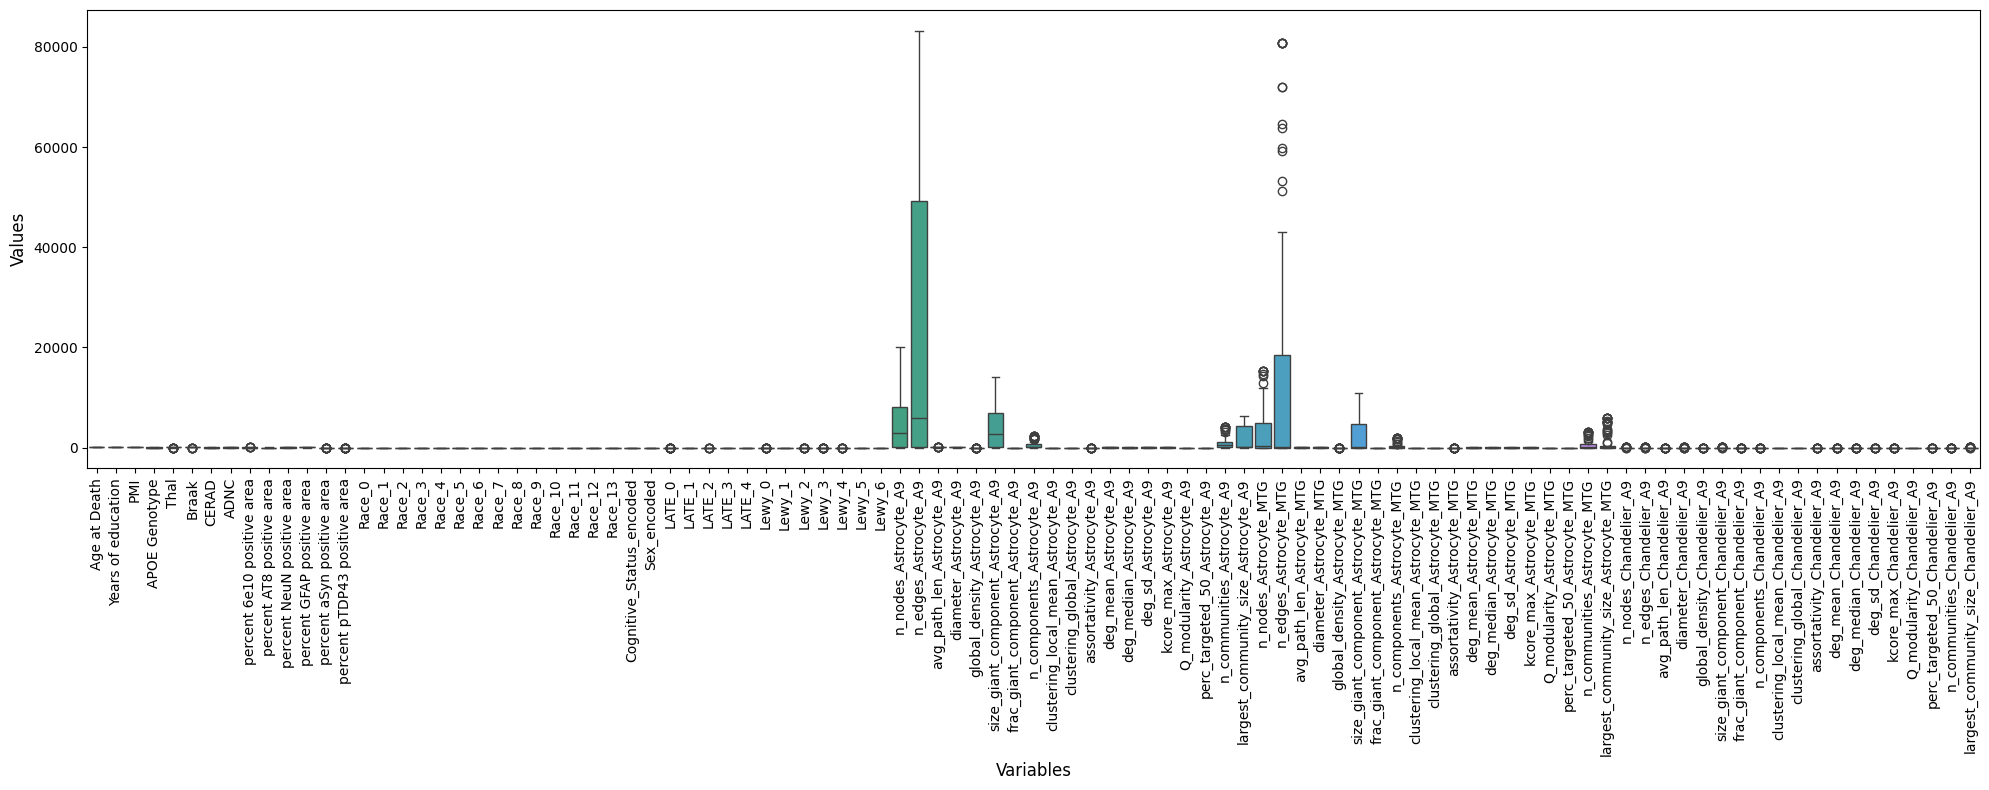

In [31]:
#Complete boxplot
floo_filterpl= floo_filter[floo_filter.columns[:100].tolist()]
plt.figure(figsize=(20, 8))
sns.boxplot(data= floo_filterpl)
#plt.title('Boxplots de 100 Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
print(data.shape)

print(floo_filter.shape)

(84, 7099)
(84, 7099)


# 3.Linear correlation between variables.


In [33]:
def linear_corr_vars(df, low=-0.25, high=0.25):
    """
    Returns ALL variable pairs whose Pearson correlation lies within [low, high].
    Only numeric columns are considered.

    """
    # Ensure DataFrame
    if isinstance(df, dict):
        df = pd.DataFrame(df)
    elif isinstance(df, str) and df.lower().endswith(('.csv', '.tsv')):
        sep = '\t' if df.lower().endswith('.tsv') else ','
        df = pd.read_csv(df, sep=sep)
    if not isinstance(df, pd.DataFrame):
        raise TypeError("df must be a pandas DataFrame, dict, or path to .csv/.tsv")

    # Keep only numeric columns
    num_vars = df.select_dtypes(include=["number"])
    if num_vars.shape[1] < 2:
        return pd.DataFrame(columns=["Variable_1", "Variable_2", "Correlation"])

    # Pearson correlation matrix
    corr = num_vars.corr(method="pearson")

    # Upper triangle only (exclude duplicates and diagonal)
    mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
    pairs = corr.where(mask).stack().reset_index()
    pairs.columns = ["Variable_1", "Variable_2", "Correlation"]

    # Filter by correlation interval
    weak = pairs[(pairs["Correlation"] >= low) & (pairs["Correlation"] <= high)] \
            .sort_values(by="Correlation", ascending=True) \
            .reset_index(drop=True)

    return weak

In [34]:
all_weak_pairs = linear_corr_vars(data, low=-0.25, high=0.25)

print(all_weak_pairs.shape)

(17996195, 3)


In [35]:
all_weak_pairs.head(10)

,Variable_1,Variable_2,Correlation
0,81_Pax6_MTG,90_Microglia-PVM_MTG,-0.250000
1,67_L6b_MTG,23_Lamp5_A9,-0.250000
2,72_L6-CT_MTG,8_L2-3-IT_A9,-0.250000
3,116_L6-IT_MTG,2_L6b_A9,-0.250000
4,71_Sncg_MTG,91_L2-3-IT_MTG,-0.250000
5,79_L6-CT_MTG,84_L6-CT_MTG,-0.250000
6,98_Oligodendrocyte_A9,53_L5-6-NP_MTG,-0.250000
7,83_L5-IT_MTG,108_Sncg_MTG,-0.249999
8,37_L6-IT_A9,3_L5-IT_A9,-0.249999
9,51_L4-IT_A9,86_Pvalb_MTG,-0.249999


In [36]:
def filter_corr(df: pd.DataFrame, z_score_threshold: float = 1.5):
    """
    Filtra un DataFrame para eliminar variables numéricas altamente correlacionadas,
    basado en un umbral de Z-score de la distribución de correlaciones.

    Args:
        df (pd.DataFrame): El DataFrame de entrada con datos mixtos.
        z_score_threshold (float): El umbral de Z-score para considerar una
                                   correlación como "extrema" o "alta".

    Returns:
        tuple: Una tupla que contiene:
            - pd.DataFrame: El DataFrame filtrado.
            - list: Una lista con los nombres de las columnas que se conservaron.
            - dict: Un diccionario con estadísticas de la distribución de correlación.
    """
    # 1. Separar variables numéricas y no numéricas
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()

    if len(numeric_cols) < 2:
        return df, df.columns.tolist(), {}

    # 2. Calcular la matriz de correlación de Pearson
    corr_matrix = df[numeric_cols].corr()

    # 3. Hacer una distribución de las correlaciones (del triángulo superior)
    upper_tri_values = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack()

    # Calcular la media y desviación estándar de las correlaciones
    mean_corr = upper_tri_values.mean()
    std_corr = upper_tri_values.std()

    # Determinar los umbrales de correlación basados en el Z-score
    # Cualquier correlación fuera de este rango será considerada "alta"
    lower_threshold = mean_corr - z_score_threshold * std_corr
    upper_threshold = mean_corr + z_score_threshold * std_corr

    stats = {
        'mean_correlation': mean_corr,
        'std_correlation': std_corr,
        'lower_corr_threshold': lower_threshold,
        'upper_corr_threshold': upper_threshold
    }

    # 4. Conservar una variable de cada par correlacionado
    cols_to_drop = set()
    for i, col in enumerate(corr_matrix.columns):
        if col in cols_to_drop:
            continue
        # Encontrar correlaciones de esta columna con las siguientes
        # que estén fuera de los umbrales definidos por el Z-score
        correlated_cols = corr_matrix.columns[i+1:][
            (corr_matrix.iloc[i+1:, i] < lower_threshold) |
            (corr_matrix.iloc[i+1:, i] > upper_threshold)
        ]
        cols_to_drop.update(correlated_cols)

    numeric_kept = [col for col in numeric_cols if col not in cols_to_drop]

    # 5. Reconstruir el DataFrame final
    final_cols_to_keep = non_numeric_cols + numeric_kept
    filtered_df = df[final_cols_to_keep]

    return filtered_df, final_cols_to_keep, stats, upper_tri_values

In [37]:
matriz_filtrada, variables_finales, info_stats, upper_tri_values = filter_corr(data, z_score_threshold=1.5)

In [38]:
matriz_filtrada.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Braak,percent NeuN positive area,percent GFAP positive area,percent aSyn positive area,percent pTDP43 positive area,...,4_L5-IT_A9,82_L5-IT_A9,17_Chandelier_A9,1_Sncg_A9,36_Sncg_A9,0_Sst-Chodl_MTG,1_Sst-Chodl_MTG,10_Sst-Chodl_MTG,4_Lamp5-Lhx6_A9,6_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,4.0,3.717419,2.383895,0.0,0.000000,...,-0.186780,-0.601820,-0.184810,0.290432,-0.107849,0.206830,0.231687,0.135806,0.174668,-0.028323
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,6.979578,13.304857,0.0,0.003001,...,-0.518775,-0.263805,-0.180420,0.313499,-0.153756,0.230810,0.306868,0.117829,0.180865,-0.104248
2,H20-33-014,82.0,16.0,7.400000,2.0,4.0,2.239914,2.051939,0.0,0.000000,...,-0.926974,-0.430633,-0.183789,0.259711,-0.126150,0.231132,0.335144,0.123044,0.183282,-0.350659
3,H21-33-015,98.0,12.0,4.100000,2.0,4.0,7.041226,2.466605,0.0,0.000000,...,-0.530712,-0.254912,-0.178662,0.448697,-0.205931,0.163330,0.409277,0.095498,0.246966,-0.141777
4,H20-33-033,68.0,18.0,6.500000,2.0,6.0,0.321992,8.476541,0.0,0.000000,...,-0.317024,-0.699846,-0.171621,0.483094,-0.092056,0.078592,0.437532,0.107258,0.211128,-0.008829
5,H21-33-043,95.0,16.0,4.400000,2.0,2.0,4.338910,1.676258,0.0,0.000000,...,-0.541573,-0.243539,-0.247596,0.399646,-0.194842,0.071731,0.417636,0.110217,0.228756,-0.118712
6,H21-33-005,95.0,16.0,10.200000,2.0,5.0,3.299674,2.845968,0.0,0.000000,...,-0.309779,-0.144418,-0.203776,0.385479,-0.193585,0.372487,0.432724,0.081861,0.178597,-0.122412
7,H20-33-031,87.0,12.0,7.916667,2.0,6.0,1.749005,6.592856,0.0,0.013836,...,-0.925845,0.084431,-0.215493,0.471335,-0.094338,0.232929,0.358156,0.108038,0.271054,-0.031030
8,H21-33-036,93.0,14.0,4.000000,2.0,5.0,5.241589,0.794675,0.0,0.000000,...,-0.400631,-0.206463,-0.172288,0.437076,-0.204465,0.097965,0.435340,0.106143,0.166127,-0.124101
9,H21-33-002,70.0,18.0,3.200000,4.0,6.0,1.473411,3.377952,0.0,0.000000,...,-0.519437,-0.213013,-0.191638,0.404379,-0.196526,0.108196,0.421242,0.095203,0.221735,-0.122234


In [39]:
variables_finales[1:10]

['Age at Death',
 'Years of education',
 'PMI',
 'APOE Genotype',
 'Braak',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'percent aSyn positive area',
 'percent pTDP43 positive area']

In [40]:
info_stats

{'mean_correlation': np.float64(0.0006141248951024859),
 'std_correlation': 0.24327802135057722,
 'lower_corr_threshold': np.float64(-0.36430290713076335),
 'upper_corr_threshold': np.float64(0.3655311569209683)}

In [41]:
upper_tri_values.head(10)

Age at Death  Years of education           -0.170467
              PMI                          -0.001818
              APOE Genotype                -0.272928
              Thal                         -0.026561
              Braak                        -0.067326
              CERAD                        -0.097792
              ADNC                         -0.072332
              percent 6e10 positive area   -0.235507
              percent AT8 positive area    -0.206451
              percent NeuN positive area    0.145788
dtype: float64

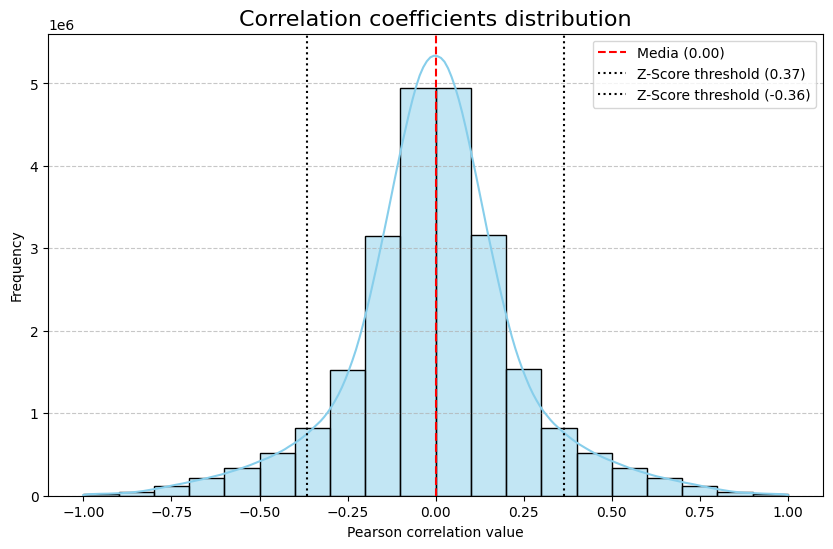

In [46]:
#Plot original correlation distribution and thresholds
plt.figure(figsize=(10, 6))

#Plot histogram and KDE
sns.histplot(upper_tri_values, kde=True, bins=20, color='skyblue')

# Añadir líneas verticales para dar contexto
plt.axvline(info_stats['mean_correlation'], color='red', linestyle='--', label=f'Media ({info_stats['mean_correlation']:.2f})')
plt.axvline(info_stats['upper_corr_threshold'], color='black', linestyle=':', label=f'Z-Score threshold ({info_stats['upper_corr_threshold']:.2f})')
plt.axvline(info_stats['lower_corr_threshold'], color='black', linestyle=':', label=f'Z-Score threshold ({info_stats['lower_corr_threshold']:.2f})')

plt.title('Correlation coefficients distribution', fontsize=16)
plt.xlabel('Pearson correlation value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [48]:
_, _, info_stats_post, upper_tri_values_post = filter_corr(matriz_filtrada, z_score_threshold=1.5)

In [50]:
upper_tri_values_post.head(10)

Age at Death  Years of education             -0.170467
              PMI                            -0.001818
              APOE Genotype                  -0.272928
              Braak                          -0.067326
              percent NeuN positive area      0.145788
              percent GFAP positive area     -0.194740
              percent aSyn positive area      0.056537
              percent pTDP43 positive area   -0.186624
              Race_0                         -0.025548
              Race_5                          0.106258
dtype: float64

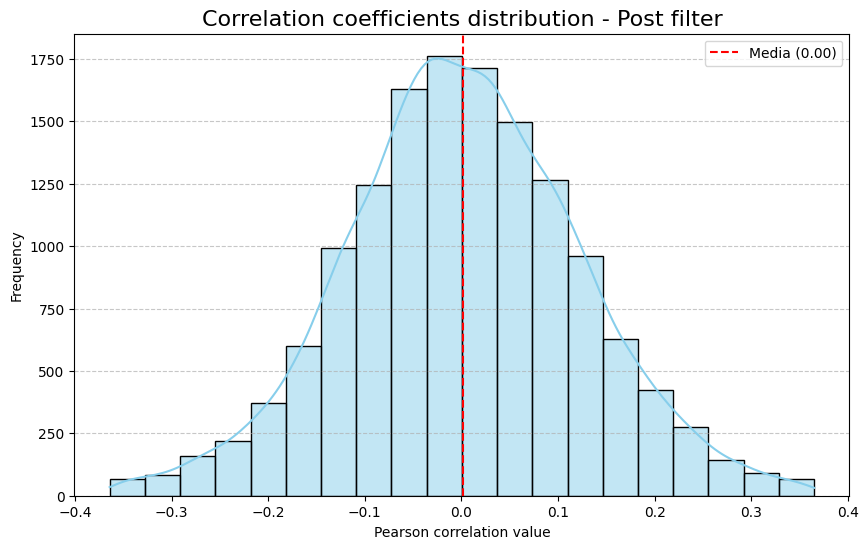

In [51]:
#Plot original correlation distribution
plt.figure(figsize=(10, 6))

#Plot histogram and KDE
sns.histplot(upper_tri_values_post, kde=True, bins=20, color='skyblue')

# Añadir líneas verticales para dar contexto
plt.axvline(info_stats_post['mean_correlation'], color='red', linestyle='--', label=f'Media ({info_stats_post['mean_correlation']:.2f})')
#plt.axvline(info_stats_post['upper_corr_threshold'], color='black', linestyle=':', label=f'Z-Score threshold ({info_stats_post['upper_corr_threshold']:.2f})')
#plt.axvline(info_stats_post['lower_corr_threshold'], color='black', linestyle=':', label=f'Z-Score threshold ({info_stats_post['lower_corr_threshold']:.2f})')

plt.title('Correlation coefficients distribution - Post filter', fontsize=16)
plt.xlabel('Pearson correlation value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 4. Non-Linear correlation between variables.

#### Targets are

* Overall AD Neuropathological Change (ADNC)
* Braak
* Thal
* CERAD
* LATE-NC
* Lewy Body Disease Stage
* 6e10
* AT8
* NeuN
* GFAP
* aSyn
* pTDP43

In [72]:
target_vars = ['ADNC',
 'Braak',
 'Thal',
 'CERAD',
 'LATE_0',
 'LATE_1',
 'LATE_2',
 'LATE_3',
 'LATE_4',
 'Lewy_0',
 'Lewy_1',
 'Lewy_2',
 'Lewy_3',
 'Lewy_4',
 'Lewy_5',
 'Lewy_6',
 'percent 6e10 positive area',
 'percent AT8 positive area',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'percent aSyn positive area',
 'percent pTDP43 positive area',
 ]

In [75]:
from sklearn.metrics import mutual_info_score

def calculate_mi_matrix(df: pd.DataFrame, target_vars: list, n_bins: int = 10):
    #Only numerics
    numerics = df.select_dtypes(include=np.number)

    #Validate
    missing_targets = set(target_vars) - set(numerics.columns)
    if missing_targets:
        raise ValueError(f"Las siguientes variables target no son numéricas o no se encuentran en el DataFrame: {missing_targets}")

    #Discretize before calculating MI
    df_discretized = pd.DataFrame()
    for col in numerics.columns:
        df_discretized[col] = pd.qcut(numerics[col], q=n_bins, labels=False, duplicates='drop')

    #MI matrix
    mi_matrix_data = {}
    for target in target_vars:
        mi_scores = [
            mutual_info_score(df_discretized[target], df_discretized[variable])
            for variable in df_discretized.columns
        ]
        mi_matrix_data[target] = mi_scores

    #Return dataframe, transpose
    mi_matrix = pd.DataFrame(mi_matrix_data, index=df_discretized.columns).T

    return mi_matrix

In [76]:
mi_matrix = calculate_mi_matrix(df = data, target_vars = target_vars, n_bins = 10)

Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-1289394752.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_discretized[col] = pd.qcut(numerics[col], q=n_bins, labels=False, duplicates='drop')
/tmp/ipython-input-1289394752.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_discretized[col] = pd.qcut(numerics[col], q=n_bins, labels=False, duplicates='drop')
/tmp/ipython-input-1289394752.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

ValueError: Input contains NaN.

# 5. Variation of Information

# 6. Voting matrix